## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns

In [14]:
# Importing the dataset
ecommerce=pd.read_csv("/Users/jenny/Documents/Data/cleaned_ecommerce_dataset.csv")
# Checking the shape of the dataframe
ecommerce.shape

(2685, 11)

### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [15]:
ecommerce.head() # Gives the first five rows

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [16]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


             helpfulness    gender  category    review    rating
helpfulness     1.000000  0.075947 -0.013408 -0.028259 -0.007523
gender          0.075947  1.000000  0.022549 -0.037884 -0.034337
category       -0.013408  0.022549  1.000000  0.001970 -0.163158
review         -0.028259 -0.037884  0.001970  1.000000 -0.036118
rating         -0.007523 -0.034337 -0.163158 -0.036118  1.000000


<Axes: >

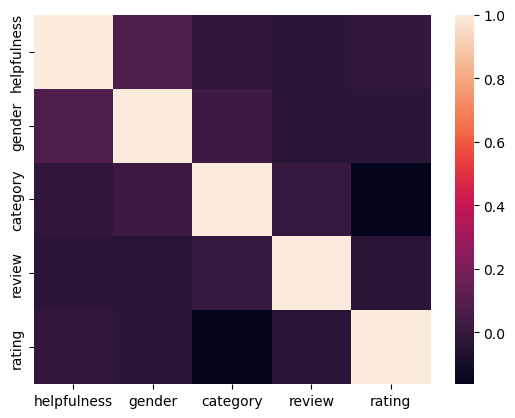

In [17]:
encoder = OrdinalEncoder()
ecommerce[['gender', 'category', 'review']] = encoder.fit_transform(ecommerce[['gender', 'category', 'review']])

correlations = ecommerce[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()
print(correlations)
sns.heatmap(correlations)

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [18]:
# Step 1: Import necessary library for data splitting
from sklearn.model_selection import train_test_split

# Case 1: Training data containing 10% of the entire data
train_case1, test_case1 = train_test_split(ecommerce, test_size=0.9)

# Case 2: Training data containing 90% of the entire data
train_case2, test_case2 = train_test_split(ecommerce, test_size=0.1)

# Step 3: Print the shape of training and testing sets in the two cases
print("Case 1 - Training data shape:", train_case1.shape)
print("Case 1 - Testing data shape:", test_case1.shape)
print("Case 2 - Training data shape:", train_case2.shape)
print("Case 2 - Testing data shape:", test_case2.shape)

Case 1 - Training data shape: (268, 11)
Case 1 - Testing data shape: (2417, 11)
Case 2 - Training data shape: (2416, 11)
Case 2 - Testing data shape: (269, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select features based on correlation values
most_correlated_features = ['category', 'gender']  # Selecting two most correlated features
least_correlated_features = ['helpfulness', 'review']  # Selecting two least correlated features

# Split data into training and testing sets for Cases 1 & 2
train_case1, test_case1 = train_test_split(ecommerce, test_size=0.9, random_state=42)
train_case2, test_case2 = train_test_split(ecommerce, test_size=0.1, random_state=42)

# Train models for each case
models = {}

# Model-a: Using the training/testing data in case 1 with two most correlated input features
X_train_a = train_case1[most_correlated_features]
y_train_a = train_case1['rating']
X_test_a = test_case1[most_correlated_features]
y_test_a = test_case1['rating']

model_a = LinearRegression()
model_a.fit(X_train_a, y_train_a)
models['model_a'] = (model_a, X_train_a, y_train_a, X_test_a, y_test_a)

# Model-b: Using the training/testing data in case 1 with two least correlated input features
X_train_b = train_case1[least_correlated_features]
X_test_b = test_case1[least_correlated_features]

model_b = LinearRegression()
model_b.fit(X_train_b, y_train_a)
models['model_b'] = (model_b, X_train_b, y_train_a, X_test_b, y_test_a)

In [20]:
# Model-c: Using the training/testing data in case 2 with two most correlated input features
X_train_c = train_case2[most_correlated_features]
y_train_c = train_case2['rating']
X_test_c = test_case2[most_correlated_features]
y_test_c = test_case2['rating']

model_c = LinearRegression()
model_c.fit(X_train_c, y_train_c)
models['model_c'] = (model_c, X_train_c, y_train_c, X_test_c, y_test_c)

# Model-d: Using the training/testing data in case 2 with two least correlated input features
X_train_d = train_case2[least_correlated_features]
X_test_d = test_case2[least_correlated_features]

model_d = LinearRegression()
model_d.fit(X_train_d, y_train_c)
models['model_d'] = (model_d, X_train_d, y_train_c, X_test_d, y_test_c)


### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [21]:
# Evaluate models
from sklearn.metrics import mean_squared_error
evaluation_results = {}

for model_name, (model, X_train, y_train, X_test, y_test) in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    evaluation_results[model_name] = {'MSE': mse, 'RMSE': rmse}

# Print evaluation results
for model_name, metrics in evaluation_results.items():
    print(f"{model_name}: MSE = {metrics['MSE']}, RMSE = {metrics['RMSE']}")


model_a: MSE = 1.8076399168603041, RMSE = 1.3444850006081526
model_b: MSE = 1.8275341162748118, RMSE = 1.3518632017607446
model_c: MSE = 1.6762330042324514, RMSE = 1.2946941740165712
model_d: MSE = 1.7315431520816085, RMSE = 1.3158811314406818


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

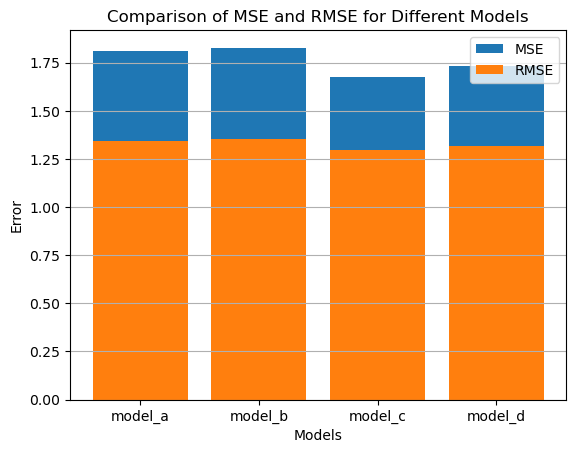

In [22]:
# Extract MSE and RMSE values from evaluation results
model_names = list(evaluation_results.keys())
mse_values = [metrics['MSE'] for metrics in evaluation_results.values()]
rmse_values = [metrics['RMSE'] for metrics in evaluation_results.values()]

# Create bar plot
plt.bar(model_names, mse_values, label='MSE')
plt.bar(model_names, rmse_values, label='RMSE')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Comparison of MSE and RMSE for Different Models')
plt.legend()
plt.grid(axis='y')
plt.show()


1) MSE Comparison:
Model C has the lowest MSE value among all models, indicating that it has the best overall performance in terms of mean squared error.
Model B has the highest MSE value, suggesting it performs the worst in terms of mean squared error.


2) RMSE Comparison:
Model C also has the lowest RMSE value, implying it has the best performance in terms of root mean squared error.
Model B again has the highest RMSE value, indicating it performs the worst in terms of root mean squared error.

It's possible that the features used in the models were not as informative or relevant as initially thought. Models A and D may have included features that introduced noise or were not strongly correlated with the target variable, leading to suboptimal performance.
Additionally, the quality of the training data, such as data cleanliness, consistency, and representativeness, could have influenced the performance of the models. If the training data were noisy or biased, it could have negatively impacted the models' performance.

Model C stands out as the best-performing model based on both MSE and RMSE values.

### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.
